# Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

## Introduction

The goal is to develop and train a dense/ fully connected neural network to recognize/classify clothing items belonging to 10 different classes and evaluate the performance of the model. We are going to use fMNIST dataset which consists of 60,000 images in the training dataset and 10,000 images in testing dataset. In Total there are 70,000 images. The images are represented as pixels. There are around 784 features representing the pixel values. Each image corresponds to a pixel array of 28X28. The dataset has 10 classes as follows
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 

In [74]:
# Importing the libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,classification_report,precision_recall_curve

In [2]:
# Importing the fMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Data Exploration

The images are represented as 28X28 pixel arrays with pixel values ranging from 0 to 255.

In [3]:
# Checking the Dtype, shape, minimum and maximum value of training and testing images
print(f' Training Image DType: {type(train_images)}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

 Training Image DType: <class 'numpy.ndarray'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


### Displaying the first 100 images of mnist dataset with corresponding class labels

In [4]:
# Creating a list of label description
label_description = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
# Function to plot the images of fMNIST dataset with corresponding labels
def plot_images(image_data,label):
    plt.imshow(image_data, cmap="binary")
    plt.title(f"{label}-{label_description[label]}", fontsize=8)
    plt.axis("off")

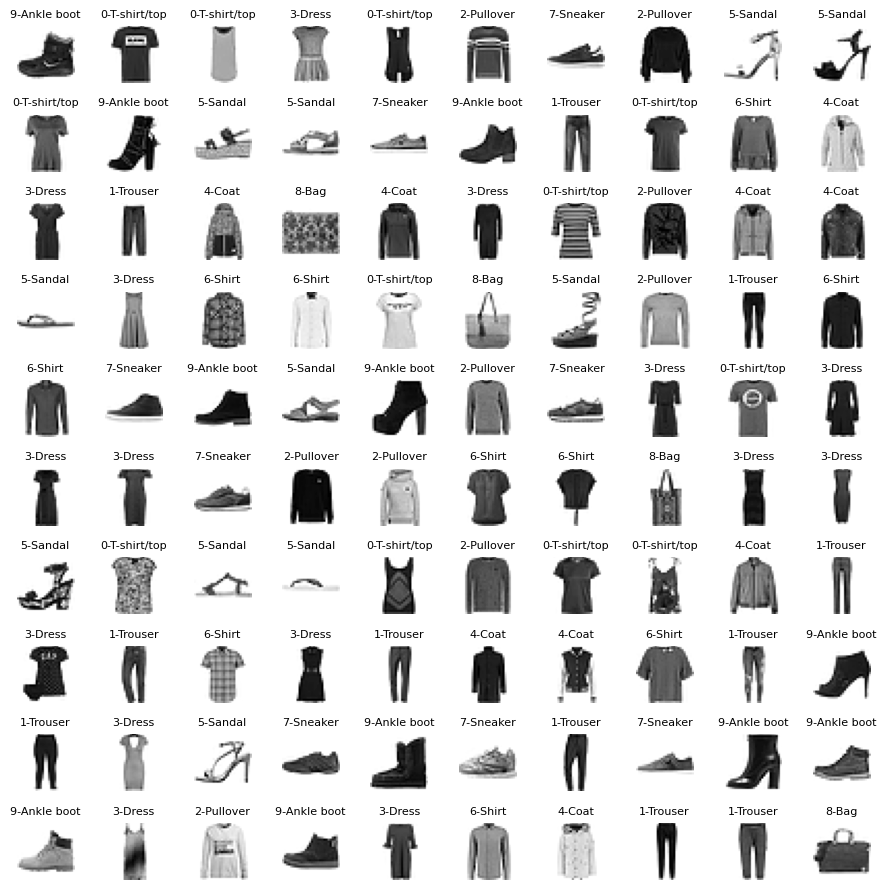

In [6]:
# Displaying the first 100 images along with class description 
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(train_images[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_images(image_data,train_labels[idx])
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

### Visualizing the pixels of first input image from training set

The images are represented in grayscale with pixel values ranging from 0 to 255. pixel value of 0-corresponds to black and 255 - white

In [7]:
# Function to visualize the pixel values of an image
def visualize_input(i, ax, y):
    img = train_images[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{train_labels[i]}-{label_description[train_labels[i]]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

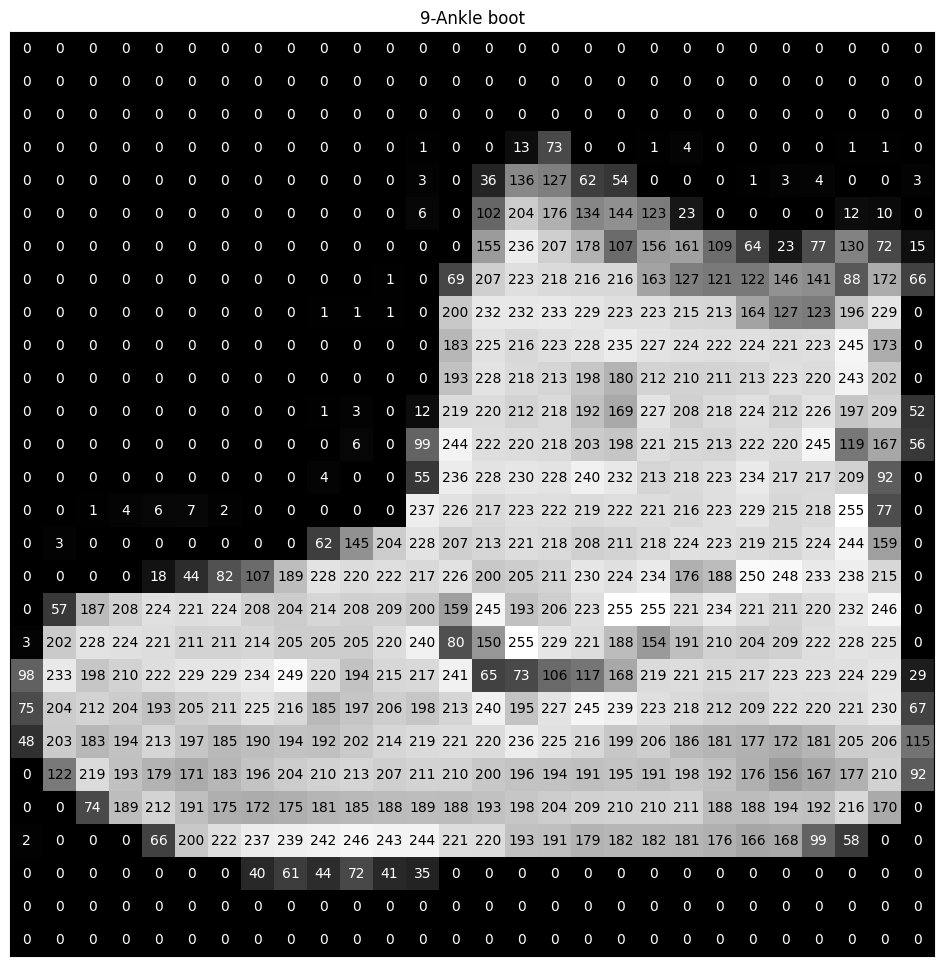

In [8]:
# Plotting the pixel value of the first image
for i in range(1):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    visualize_input(i, ax, train_labels)

### Piechart to show the class distribution/skewness of the dataset

The images are **equally distributed across classes**. There are **6000 images for each class**. And the dataset has **0 skewness**. 

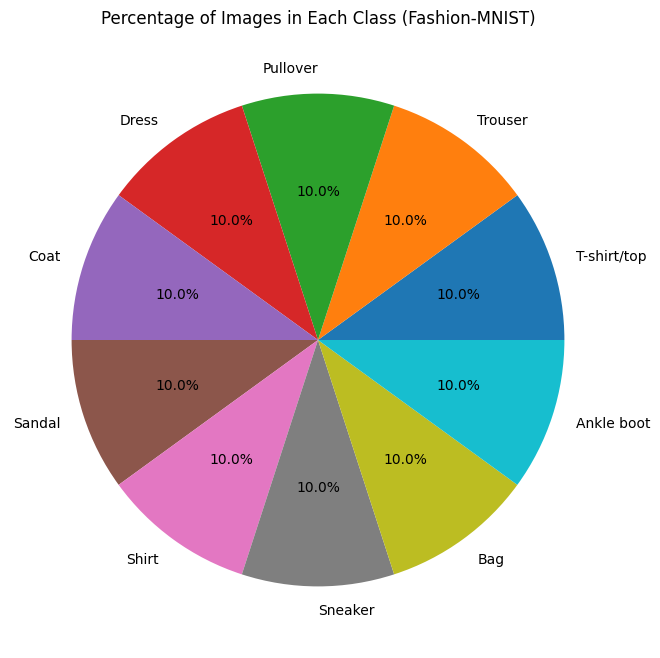

In [9]:
# Count the occurrences of each class
class_counts = np.bincount(train_labels)
# Plot a piechart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=label_description, autopct='%1.1f%%')
plt.title('Percentage of Images in Each Class (Fashion-MNIST) in Training dataset')
plt.show()


In [19]:
np.where(test_labels == 0)

<function tuple.count(value, /)>

### Pixel value distribution of an image

The below histogram shows the intensity of pixel values. The **maximum pixel values** are **0-black**. The **most dominant pixel values** are **black and grey pixels**.

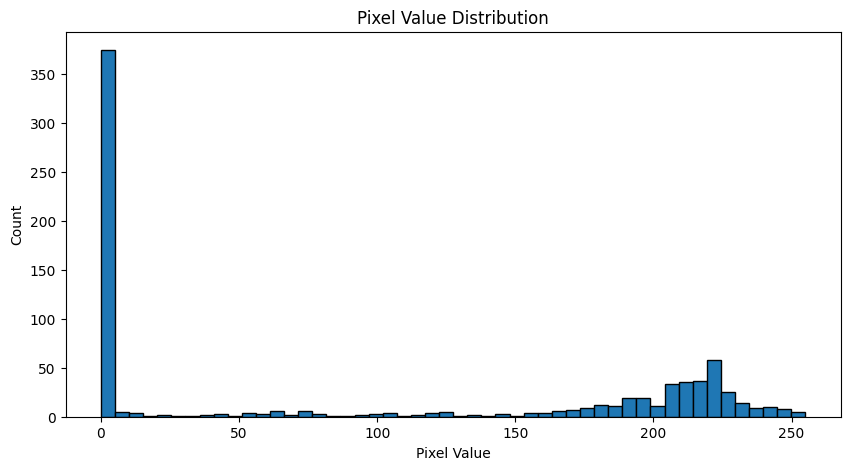

In [10]:
# Plot the distribution of pixel values - First image in training dataset
fig = plt.figure(figsize=(10, 5))
plt.hist(train_images[0].flatten(), bins=50, edgecolor='black')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

### Average image per class

The below plot calculates and shows the **average image for the current class by taking the mean of all images corresponding to that class**. From the plot, we are **able to clearly identify the structure of T-shirt,Trouser,Dress,ankle boot**. But the **structures/features of pullover,coat and shirt are somewhat similar**. So, **the model might find it difficult to classify these clothing**. Also, the **features of sandal and bag is not clear** from the average image. 

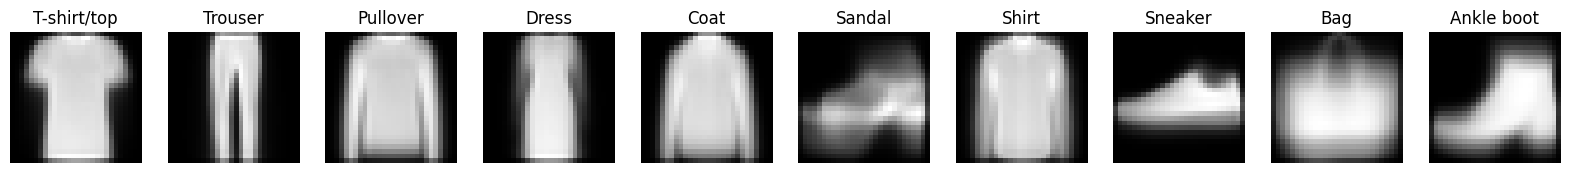

In [11]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for image in range(10):
    image_indices = np.where(train_labels == image)[0]
    avg_image = np.mean(train_images[image_indices], axis=0)
    axes[image].imshow(avg_image, cmap='gray')
    axes[image].set_title(label_description[image])
    axes[image].axis('off')
plt.show()

## Data Pre-Processing

### Splitting the Training dataset into training and validation set

Now out of **60000 images in training dataset**, we have split the dataset into **training dataset - 48,000 images** and **validation dataset - 12,000 images**. The **testing dataset contains 10,000 images**.

In [20]:
# Initializing the training size
training_size = 0.80
# getting the total number of rows
total_rows = train_images.shape[0]
train_size = int(total_rows*training_size)
 
# Split image data into validation and training
train_img = train_images[0:train_size]
val_images = train_images[train_size:]

# Splitting the labels into training and validation
train_labl = train_labels[0:train_size]
val_labels = train_labels[train_size:]

In [32]:
# Flattening the 28x28 image into dim=1 (784,) vector
train_img = train_img.reshape((48000, 28 * 28)) 
val_images = val_images.reshape((12000, 28 * 28)) 
test_images = test_images.reshape((10000, 28 * 28))

# normalizing the data to the range [0,1] by min-max range, and casting it to float32
train_img = train_img.astype("float32") / 255
val_images = val_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

## Modeling

* Here We are using **1-input layer which consists of 128 neurons** and **1 - hidden layer** and **1-output layer** which has **10 output neurons representing each class**. 
* **All the layers are fully-connected**. 
* The **activation function** is **Rectified Linera unit and Softmax**. Also we are using **adam optimizer** and **sparse categorical cross-entropy as loss function**. 
* We have given **epochs as 10** and **batch size is 128**. Total **training steps** per epoch is **375**. 
* We got a **accuracy of 91.5% on the training dataset after 10 epochs**.

In [30]:
# Defining a simple dense neural network
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [34]:
# compiling the model 
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [35]:
# Fitting the model to the training dataset
model.fit(train_img, train_labl, epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.5196 - accuracy: 0.8174
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3851 - accuracy: 0.8611
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3439 - accuracy: 0.8749
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3142 - accuracy: 0.8846
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2953 - accuracy: 0.8915
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2776 - accuracy: 0.8981
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2651 - accuracy: 0.9024
Epoch 8/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2532 - accuracy: 0.9065
Epoch 9/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2398 - accuracy: 0.9112
Epoch 10/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2295 - accuracy: 0.9155

## Evaluation on Validation Dataset

* We got a **accuracy of 89% on the validation dataset**. 
* From the classification report, we can find that the model is **able to classify Class 1 - Trousers with higher precision and recall of 99% and 98%** respectively. 
* Also the model is able to classify **Class 5 - Sandals, Class 8 - Bag and Class 9 - Ankle Boot accurately**.
* The **model struggles to recognize Class 2 - Pullover, Class 4 - Coat, Class 6 - Shirt** because all **the images in this class has similar features and structures**. So, the model is finding it difficult to classify these classes. 

In [36]:
# Evaluating the model on the validation dataset
val_loss, val_acc = model.evaluate(val_images, val_labels)
print(f"Validation Accuracy: {val_acc}")

375/375 [==============================] - 1s 3ms/step - loss: 0.3067 - accuracy: 0.8898
Validation Accuracy: 0.8897500038146973


In [43]:
# Predicting the probablities of each class on the validation dataset
val_pred_prob = model.predict(val_images)

375/375 [==============================] - 1s 2ms/step


In [46]:
# From the probabilities finding the class with the highest probability as predicted class label
val_pred = np.argmax(val_pred_prob,axis = 1)

In [49]:
# Generating the classification report for validation dataset
validation_class_report = classification_report(val_labels,val_pred)

In [51]:
# Printing the precision,recall,F1-score, support for each class along with Overall accuracy
print(validation_class_report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.83      1236
           1       0.99      0.98      0.98      1206
           2       0.81      0.83      0.82      1232
           3       0.83      0.93      0.88      1204
           4       0.78      0.85      0.82      1215
           5       0.97      0.96      0.96      1194
           6       0.77      0.65      0.70      1149
           7       0.94      0.96      0.95      1180
           8       0.97      0.97      0.97      1180
           9       0.96      0.96      0.96      1204

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



## Evaluation on testing dataset

* We got an **overall accuracy of 89% on the testing as well as validation dataset**.
* **Almost same accuracy in testing and validation dataset** implies that **the model generalizes well and pretty good in predicting the classes**. 
* In the testing dataset also **model struggles to recognize Class 2 - Pullover, Class 4 - Coat, Class 6 - Shirt** because all **the images in this class has similar features and structures**.

In [52]:
# Evaluating the model on the testing dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Testing dataset Accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8855
Testing dataset Accuracy: 0.8855000138282776


In [53]:
# Predicting the probablities of each class on the testing dataset
test_pred_prob = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [54]:
# From the probabilities finding the class with the highest probability as predicted class label
test_pred = np.argmax(test_pred_prob,axis = 1)

In [55]:
# Generating the classification report for validation dataset
testing_class_report = classification_report(test_labels,test_pred)

In [56]:
# Printing the precision,recall,F1-score, support for each class along with Overall accuracy on testing set
print(testing_class_report)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.83      0.80      1000
           3       0.82      0.93      0.87      1000
           4       0.77      0.85      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.78      0.63      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



### Increasing the precision of Class 5 - Sandals

Already the **precision of Class 5 - Sandals is 0.97 and recall is 0.96 on validation dataset**. At **custom threshold 0.81392294**, the **precision is increased to 0.99% but the recall decresed to 0.92%**

In [76]:
# Choose one image class 5 - Sandals
positive_class = 5
binary_labels = []

In [77]:
# Converting it as binary labels 5-Sanadals and Not Sandals
for class_label in val_labels:
    if class_label == positive_class:
        binary_labels.append(1)
    else:
        binary_labels.append(0)

In [78]:
# converting list of labels into array
val_pred_5 = np.array(binary_labels)

In [79]:
# getting the predicted probabilities of the model for Class 5
val_pred_prob_class5 = val_pred_prob[:, 5]

In [80]:
# printing the predicted probabilities of the model for class 5
val_pred_prob_class5

array([9.9999571e-01, 1.4442147e-04, 1.7816755e-11, ..., 1.5354162e-08,
       3.1583514e-07, 9.9998736e-01], dtype=float32)

In [81]:
# Calculating the precision, recall and threshold of Class 5 - sandals
precisions, recalls, thresholds = precision_recall_curve(
    val_pred_5, val_pred_prob_class5)

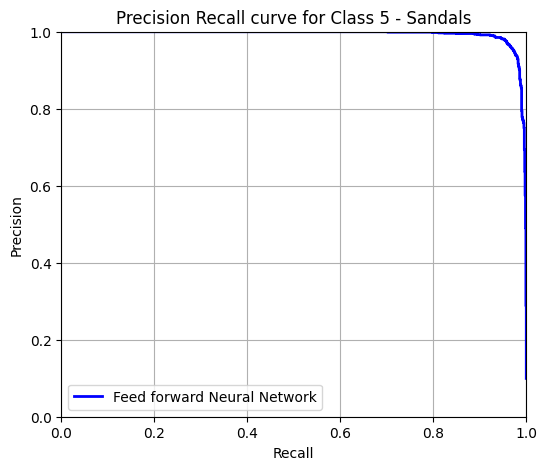

In [104]:
# Plotting the precision recall curve
plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Feed forward Neural Network")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.title("Precision Recall curve for Class 5 - Sandals")
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [150]:
# finding the threshold at which precision is 99%
idx_for_99_precision = (precisions >= 0.99).argmax()
threshold_for_99_precision = thresholds[idx_for_99_precision]
print("Threshold value at which precision is greater than 99% ", threshold_for_99_precision)

Threshold value at which precision is greater than 99%  0.81392294


In [151]:
# Adjusting the class predictions based on the new threshold
val_pred_99_precision = (val_pred_prob_class5 >= threshold_for_99_precision)

In [152]:
# recalculated precision
precision_score(val_pred_5,val_pred_99_precision)

0.9901697944593387

In [154]:
# recalculated recall
recall_score(val_pred_5,val_pred_99_precision)

0.9279731993299832

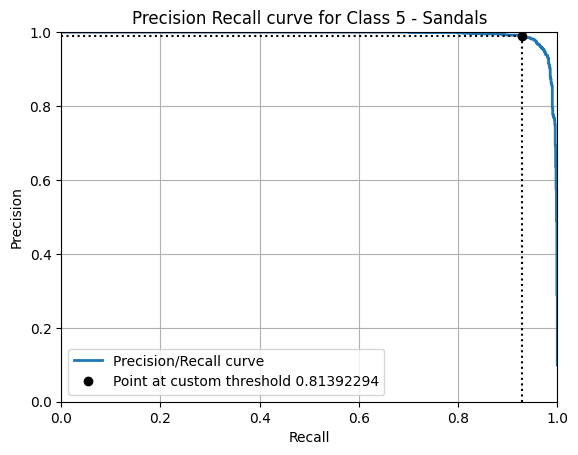

In [155]:
# Plotting precision recall curve for Class 5- Sandals at custom threshold
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx_for_99_precision], recalls[idx_for_99_precision]], [0., precisions[idx_for_99_precision]], "k:")
plt.plot([0.0, recalls[idx_for_99_precision]], [precisions[idx_for_99_precision], precisions[idx_for_99_precision]], "k:")
plt.plot([recalls[idx_for_99_precision]], [precisions[idx_for_99_precision]], "ko",
         label="Point at custom threshold 0.81392294")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall curve for Class 5 - Sandals")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

### Increasing the recall of Class 5 - Sandals

when trying to increase the recall from 0.96 to 1.0 the precision decreased to 0.0995 which is not acceptable

In [156]:
# finding the threshold at which recall is greater than 98%
idx_for_99_recall = (recalls >= 0.98).argmax()
threshold_for_99_recall = thresholds[idx_for_99_recall]
print("Threshold value at which recall is greater than 98% ", threshold_for_99_recall)

Threshold value at which recall is greater than 98%  1.354683e-19


In [162]:
# Adjusting the values based on the new threshold at which recall is greater than 98%
val_pred_99_recall = (val_pred_prob_class5 >= threshold_for_99_recall)

In [158]:
# recalculating the precision
precision_score(val_pred_5,val_pred_99_recall)

0.0995

In [159]:
# recalculating the recall
recall_score(val_pred_5,val_pred_99_recall)

1.0

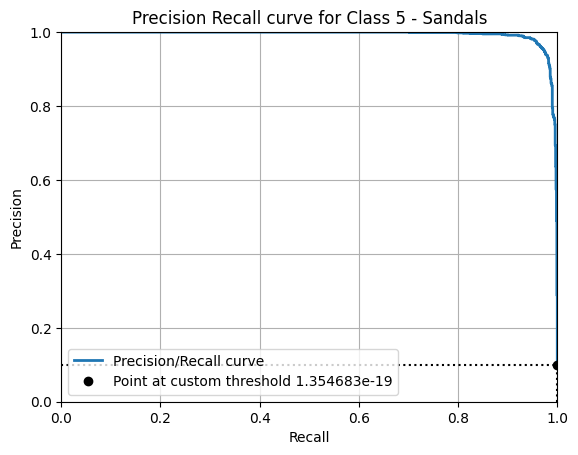

In [161]:
# Plotting precision recall curve for Class 5 - Sandals at custom threshold
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx_for_99_recall], recalls[idx_for_99_recall]], [0., precisions[idx_for_99_recall]], "k:")
plt.plot([0.0, recalls[idx_for_99_recall]], [precisions[idx_for_99_recall], precisions[idx_for_99_recall]], "k:")
plt.plot([recalls[idx_for_99_recall]], [precisions[idx_for_99_recall]], "ko",
         label="Point at custom threshold 1.354683e-19")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall curve for Class 5 - Sandals")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()


## Conclusion

* To summarize, the **classes in dataset is balanced with 0 skewness**. 
* The model is trained with 48,000 images. It produces a **training accuracy of 91%**. It produces **similar accuracy of 89% on both validation and testing dataset** which implies that the **model generalizes well and is able to classify fashion clothing classes**. 
* But **model struggles to classify pullover, shirt and coat due to similar features and structures**.